# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

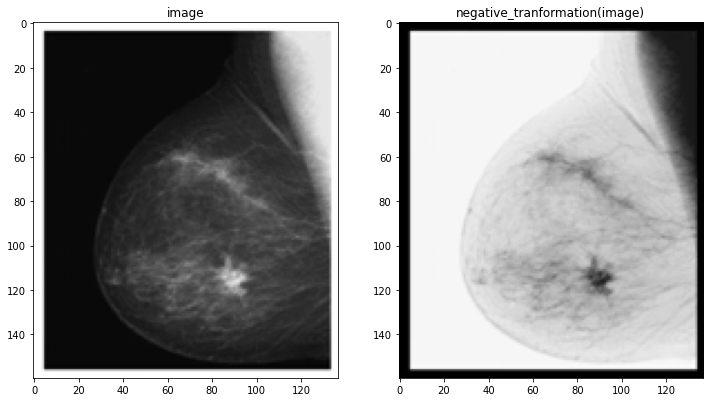

In [19]:
'''
1
Negative Transformation
'''
from skimage.color import rgba2rgb

image = io.imread('imgs/Picture1.png')
image = rgb2gray(rgba2rgb(image))
def negative(image):
    _image = np.copy(image)
    _image = 255 - _image
    return _image 
neg = negative(image)
show_images([image,neg],["image","negative_tranformation(image)"])

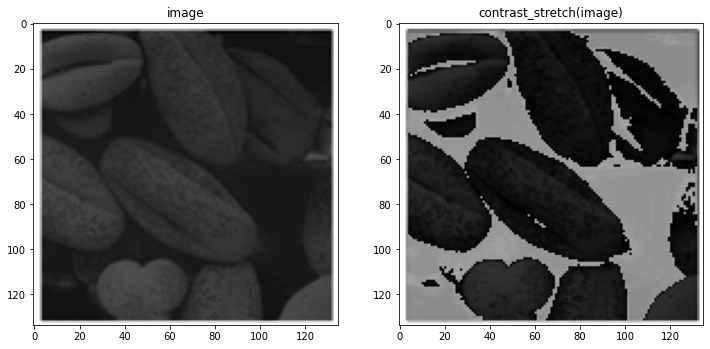

In [16]:
'''
2
Contrast Enhancement
'''
image = io.imread('imgs/Picture2.png')
image = rgb2gray(rgba2rgb(image))*255

def line_eq(x):
    return ((150/100) * x + 50)

def contrast(image):
    _image = np.copy(image)
    _image[_image<=100] = _image[_image<=100] * 1.5 + 50
    return _image
    
show_images([image,contrast(image)],["image","contrast_stretch(image)"])

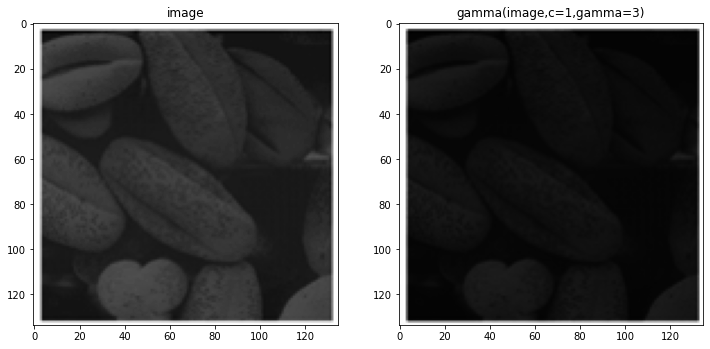

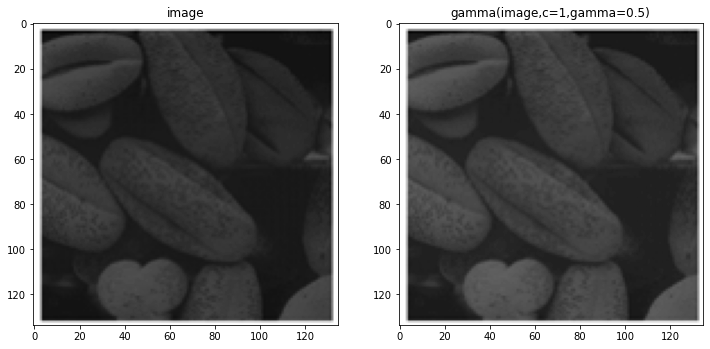

In [18]:
'''
3
Gamma Correction
'''
image = io.imread('imgs/Picture2.png')
image = rgb2gray(rgba2rgb(image))
def gamma(image,c,gm):
    _image = np.copy(image)
    _image = c * (_image**gm)
    return _image
show_images([image,gamma(image,1,3)],["image","gamma(image,c=1,gamma=3)"])
show_images([image,gamma(image,1,0.5)],["image","gamma(image,c=1,gamma=0.5)"])


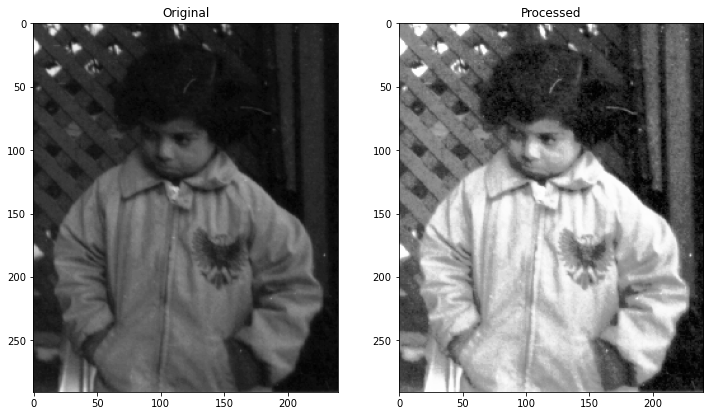

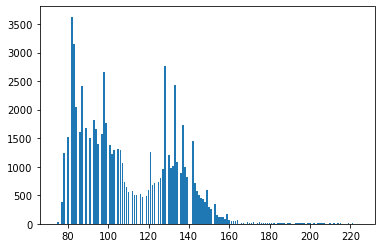

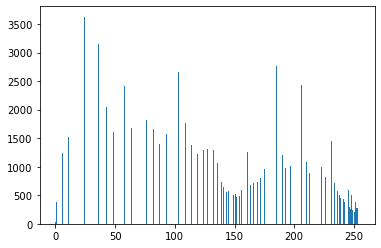

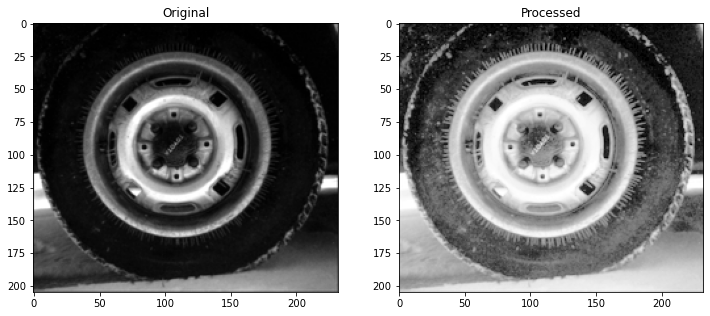

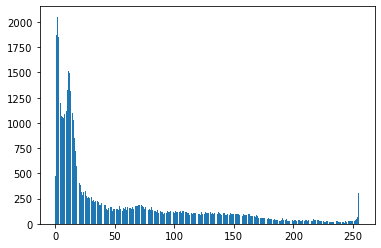

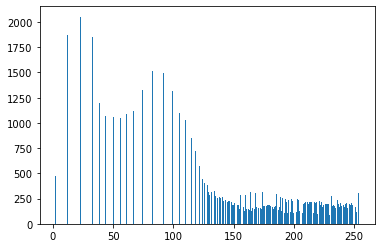

In [20]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''
pout = io.imread('./imgs/pout.tif')
tire = io.imread('./imgs/tire.tif')

def getImageWithHist(name,ext,nbins=256):
    img = io.imread('./imgs/'+name+'.'+ext)
    #print(pout.shape)
    #img = rgb2gray(img)
    H = np.zeros((1,nbins))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            H[0,int(img[i][j])] += 1

    H_c = np.zeros((1,nbins))
    H_c[0,0] = H[0,0]
    for i in range(1,H.shape[1]):
        H_c[0,i] = H[0,i] + H_c[0,i-1]
    
    map = np.zeros((1,nbins))

    for i in range(nbins):
        map[0,i] = int((nbins - 1) * H_c[0,i] / (img.shape[0] * img.shape[1]))
    
    output = np.zeros((img.shape[0],img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            output[i][j] = map[0,img[i][j]]
    return output
    
show_images([pout,getImageWithHist('pout','tif')],['Original','Processed'])
showHist(pout)
showHist(getImageWithHist('pout','tif'))
show_images([tire,getImageWithHist('tire','tif')],['Original','Processed'])
showHist(tire)
showHist(getImageWithHist('tire','tif'))